# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 7:
- Attendance and Stadium Analysis: Performing descriptive analysis using various data analysis and visualization techniques 
- Solve business question related to K-Nearest Neighbor (KNN) classification
- Writing interpretation for each analysis individually.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


# Descriptive Analysis and Visualization
## Which stadiums have the highest average attendance, and how does attendance vary across competitions?

In [4]:
# Group by stadium and calculate average attendance
stadium_attendance = data.groupby('stadium')['attendance'].mean().sort_values(ascending=False).head(10)

# Group by competition and calculate average attendance
competition_attendance = data.groupby('competition_type')['attendance'].mean()

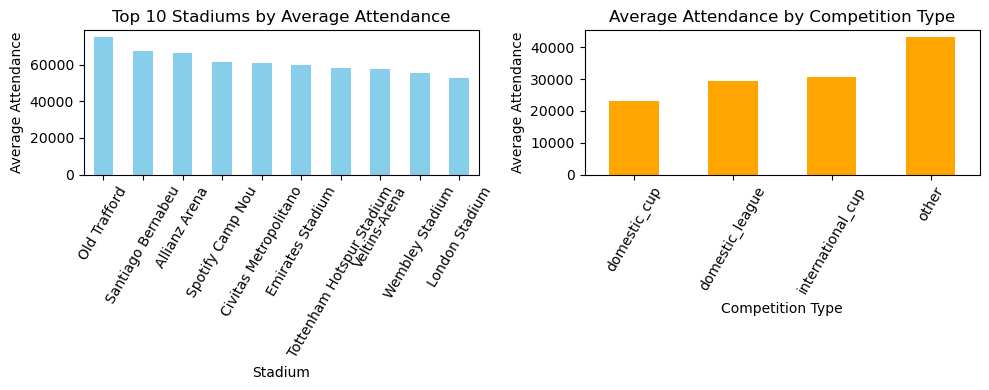

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
# Top stadiums by attendance
plt.subplot(1, 2, 1)
stadium_attendance.plot(kind='bar', color='skyblue')
plt.title("Top 10 Stadiums by Average Attendance")
plt.xlabel("Stadium")
plt.ylabel("Average Attendance")
plt.xticks(rotation=60)

# Attendance by competition
plt.subplot(1, 2, 2)
competition_attendance.plot(kind='bar', color='orange')
plt.title("Average Attendance by Competition Type")
plt.xlabel("Competition Type")
plt.ylabel("Average Attendance")
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### Interpretation:
- Certain stadiums consistently attract higher attendance, which could be influenced by team popularity or location.
- Different competition types (domestic vs. international) also show significant variation in attendance, with more prestigious competitions attracting higher crowds.

# K-Nearest Neighbor (KNN) Classification
## Can we classify matches as high or low attendance based on features such as stadium, competition type, and home/away team positions?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create attendance labels
median_attendance = data['attendance'].median()
data['attendance_label'] = ['High' if x > median_attendance else 'Low' for x in data['attendance']]

In [6]:
# Encode categorical features
le_stadium = LabelEncoder()
le_competition = LabelEncoder()

In [9]:
data['stadium_encoded'] = le_stadium.fit_transform(data['stadium'])
data['competition_encoded'] = le_competition.fit_transform(data['competition_type'])

In [16]:
# Define features and target
X = data[['stadium_encoded', 'competition_encoded', 'home_club_position', 'away_club_position']]
y = data['attendance_label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[243 131]
 [128 429]]
              precision    recall  f1-score   support

        High       0.65      0.65      0.65       374
         Low       0.77      0.77      0.77       557

    accuracy                           0.72       931
   macro avg       0.71      0.71      0.71       931
weighted avg       0.72      0.72      0.72       931



### Interpretation:
- Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.
- Classification Report: Provides precision, recall, F1-score, and accuracy, helping evaluate the model’s performance in predicting high/low attendance.